In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
train_data = pd.read_csv("data/train.csv")

In [3]:
train_data

id         Brand Material    Size  Compartments  \
0            0      Jansport  Leather  Medium           7.0   
1            1      Jansport   Canvas   Small          10.0   
2            2  Under Armour  Leather   Small           2.0   
3            3          Nike    Nylon   Small           8.0   
4            4        Adidas   Canvas  Medium           1.0   
...        ...           ...      ...     ...           ...   
299995  299995        Adidas  Leather   Small           9.0   
299996  299996      Jansport  Leather   Large           6.0   
299997  299997          Puma   Canvas   Large           9.0   
299998  299998        Adidas    Nylon   Small           1.0   
299999  299999  Under Armour   Canvas   Small           2.0   

       Laptop Compartment Waterproof      Style  Color  Weight Capacity (kg)  \
0                     Yes         No       Tote  Black             11.611723   
1                     Yes        Yes  Messenger  Green             27.078537   
2                     Yes         No  Messenger    Red             16.643760   
3                     Yes         No  Messenger  Green             12.937220   
4                     Yes        Yes  Messenger  Green             17.749338   
...                   ...        ...        ...    ...                   ...   
299995                 No         No       Tote   Blue             12.730812   
299996                 No        Yes       Tote   Blue             26.633182   
299997                Yes        Yes   Backpack   Pink             11.898250   
299998                 No        Yes       Tote   Pink              6.175738   
299999                 No        Yes   Backpack  Black             18.568865   

            Price  
0       112.15875  
1        68.88056  
2        39.17320  
3        80.60793  
4        86.02312  
...           ...  
299995  129.99749  
299996   19.85819  
299997  111.41364  
299998  115.89080  
299999   26.72762  

[300000 rows x 11 columns]

In [358]:
train_data.describe().T

count           mean           std   min  \
id                    300000.0  149999.500000  86602.684716   0.0   
Compartments          300000.0       5.443590      2.890766   1.0   
Weight Capacity (kg)  299862.0      18.029994      6.966914   5.0   
Price                 300000.0      81.411107     39.039340  15.0   

                               25%            50%            75%       max  
id                    74999.750000  149999.500000  224999.250000  299999.0  
Compartments              3.000000       5.000000       8.000000      10.0  
Weight Capacity (kg)     12.097867      18.068614      24.002375      30.0  
Price                    47.384620      80.956120     115.018160     150.0

In [4]:
train_data.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [6]:
print(train_data.isna().any())

id                      False
Brand                    True
Material                 True
Size                     True
Compartments            False
Laptop Compartment       True
Waterproof               True
Style                    True
Color                    True
Weight Capacity (kg)     True
Price                   False
dtype: bool


<Axes: xlabel='Weight Capacity (kg)', ylabel='Price'>

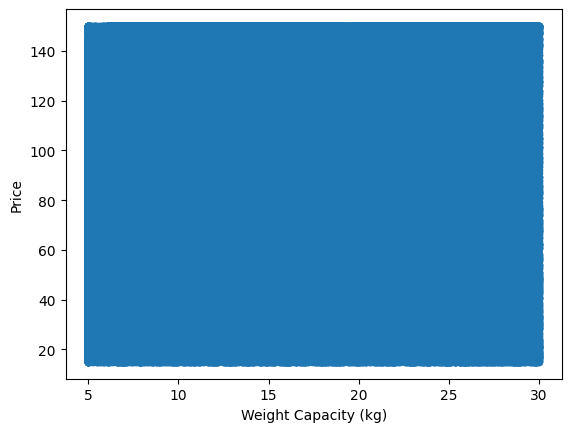

In [7]:
train_data.plot(x = "Weight Capacity (kg)", y = "Price", kind = "scatter")

In [8]:
import seaborn as sns

<Axes: xlabel='Weight Capacity (kg)', ylabel='Price'>

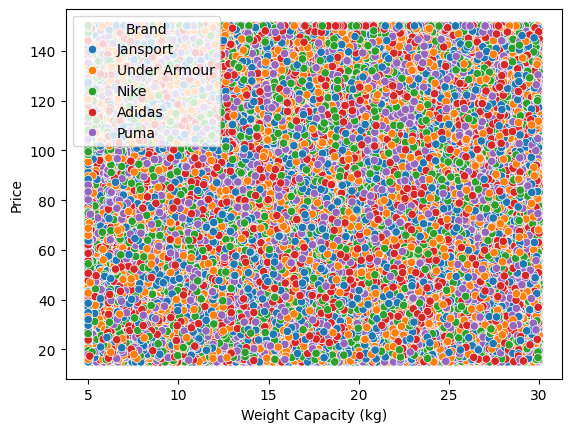

In [9]:
sns.scatterplot(data = train_data, x = "Weight Capacity (kg)", y = "Price", hue = "Brand" )

In [195]:
jansport_data = train_data[train_data.Brand == "Jansport"].dropna(subset=["Weight Capacity (kg)"], axis = 0, inplace=False)
jansport_data.isna().any()
jansport_data

id     Brand Material    Size  Compartments Laptop Compartment  \
0            0  Jansport  Leather  Medium           7.0                Yes   
1            1  Jansport   Canvas   Small          10.0                Yes   
23          23  Jansport  Leather  Medium           1.0                Yes   
24          24  Jansport    Nylon   Large           1.0                 No   
27          27  Jansport   Canvas  Medium          10.0                 No   
...        ...       ...      ...     ...           ...                ...   
299968  299968  Jansport   Canvas   Large           7.0                 No   
299969  299969  Jansport  Leather   Small           2.0                 No   
299975  299975  Jansport  Leather  Medium           8.0                 No   
299976  299976  Jansport  Leather  Medium           7.0                 No   
299996  299996  Jansport  Leather   Large           6.0                 No   

       Waterproof      Style  Color  Weight Capacity (kg)      Price  
0              No       Tote  Black             11.611723  112.15875  
1             Yes  Messenger  Green             27.078537   68.88056  
23             No       Tote   Blue             12.571250  106.83635  
24             No   Backpack    Red             25.936886   80.95478  
27             No   Backpack   Pink              6.513476   96.79852  
...           ...        ...    ...                   ...        ...  
299968         No  Messenger    Red             21.717193   41.96325  
299969        Yes   Backpack    Red             28.964673   23.61372  
299975        Yes  Messenger    NaN             20.355501  110.42196  
299976         No  Messenger  Green             22.948991   45.56595  
299996        Yes       Tote   Blue             26.633182   19.85819  

[56063 rows x 11 columns]

In [196]:
jansport_data = pd.get_dummies(jansport_data, columns=["Laptop Compartment", "Waterproof", "Size", "Style", "Material", "Color"], drop_first= True)
#jansport_data = jansport_data.drop(columns=["Color", "Brand"], axis = 1)
jansport_data = jansport_data.drop(columns="Brand", axis = 1)

In [197]:
jansport_data

id  Compartments  Weight Capacity (kg)      Price  \
0            0           7.0             11.611723  112.15875   
1            1          10.0             27.078537   68.88056   
23          23           1.0             12.571250  106.83635   
24          24           1.0             25.936886   80.95478   
27          27          10.0              6.513476   96.79852   
...        ...           ...                   ...        ...   
299968  299968           7.0             21.717193   41.96325   
299969  299969           2.0             28.964673   23.61372   
299975  299975           8.0             20.355501  110.42196   
299976  299976           7.0             22.948991   45.56595   
299996  299996           6.0             26.633182   19.85819   

        Laptop Compartment_Yes  Waterproof_Yes  Size_Medium  Size_Small  \
0                         True           False         True       False   
1                         True            True        False        True   
23                        True           False         True       False   
24                       False           False        False       False   
27                       False           False         True       False   
...                        ...             ...          ...         ...   
299968                   False           False        False       False   
299969                   False            True        False        True   
299975                   False            True         True       False   
299976                   False           False         True       False   
299996                   False            True        False       False   

        Style_Messenger  Style_Tote  Material_Leather  Material_Nylon  \
0                 False        True              True           False   
1                  True       False             False           False   
23                False        True              True           False   
24                False       False             False            True   
27                False       False             False           False   
...                 ...         ...               ...             ...   
299968             True       False             False           False   
299969            False       False              True           False   
299975             True       False              True           False   
299976             True       False              True           False   
299996            False        True              True           False   

        Material_Polyester  Color_Blue  Color_Gray  Color_Green  Color_Pink  \
0                    False       False       False        False       False   
1                    False       False       False         True       False   
23                   False        True       False        False       False   
24                   False       False       False        False       False   
27                   False       False       False        False        True   
...                    ...         ...         ...          ...         ...   
299968               False       False       False        False       False   
299969               False       False       False        False       False   
299975               False       False       False        False       False   
299976               False       False       False         True       False   
299996               False        True       False        False       False   

        Color_Red  
0           False  
1           False  
23          False  
24           True  
27          False  
...           ...  
299968       True  
299969       True  
299975      False  
299976      False  
299996      False  

[56063 rows x 18 columns]

In [ ]:
underArmour_data = train_data[train_data.Brand== "Under Armour"].dropna(how="any",axis=0,inplace=False)
nike_data = train_data[train_data.Brand== "Nike"].dropna(how="any",axis=0,inplace=False)
adidas_data = train_data[train_data.Brand== "Adidas"].dropna(how="any",axis=0,inplace=False)
puma_data = train_data[train_data.Brand== "Puma"].dropna(how="any",axis=0,inplace=False)

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Weight Capacity (kg)'}>]], dtype=object)

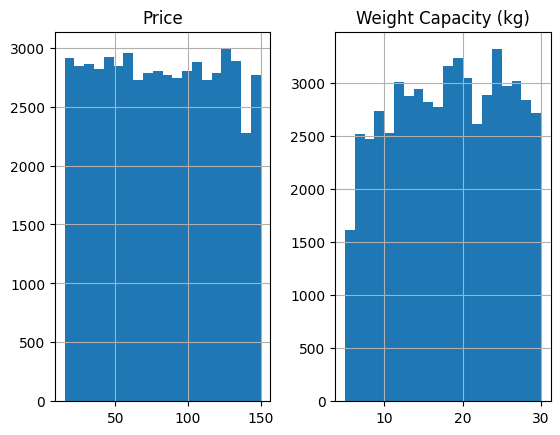

In [38]:
jansport_data.hist(column=["Price","Weight Capacity (kg)"],bins=20)

<Axes: xlabel='Weight Capacity (kg)', ylabel='Price'>

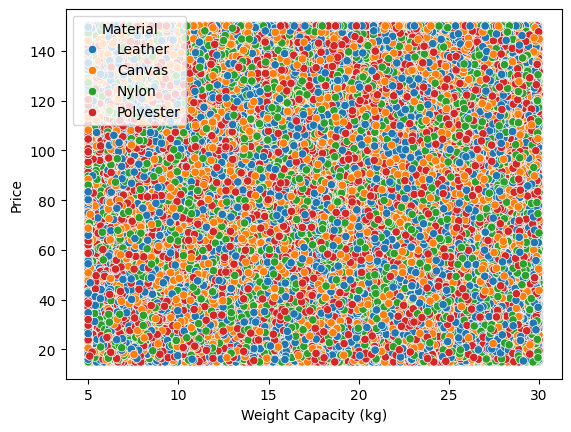

In [12]:
sns.scatterplot(data = train_data, x = "Weight Capacity (kg)", y = "Price", hue = "Material" )

In [13]:
train_data.describe().T

count           mean           std   min  \
id                    300000.0  149999.500000  86602.684716   0.0   
Compartments          300000.0       5.443590      2.890766   1.0   
Weight Capacity (kg)  299862.0      18.029994      6.966914   5.0   
Price                 300000.0      81.411107     39.039340  15.0   

                               25%            50%            75%       max  
id                    74999.750000  149999.500000  224999.250000  299999.0  
Compartments              3.000000       5.000000       8.000000      10.0  
Weight Capacity (kg)     12.097867      18.068614      24.002375      30.0  
Price                    47.384620      80.956120     115.018160     150.0

<Axes: xlabel='Compartments', ylabel='Price'>

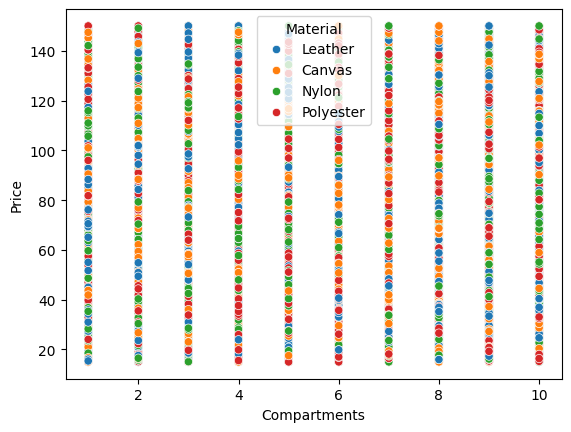

In [14]:
sns.scatterplot(data = train_data, x = "Compartments", y = "Price", hue = "Material" )

<Axes: xlabel='Weight Capacity (kg)', ylabel='Price'>

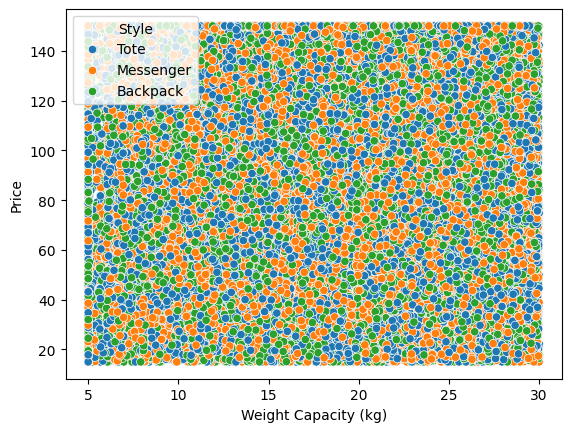

In [18]:
sns.scatterplot(data = jansport_data, x = "Weight Capacity (kg)", y = "Price", hue = "Style" )

<Axes: xlabel='Weight Capacity (kg)', ylabel='Price'>

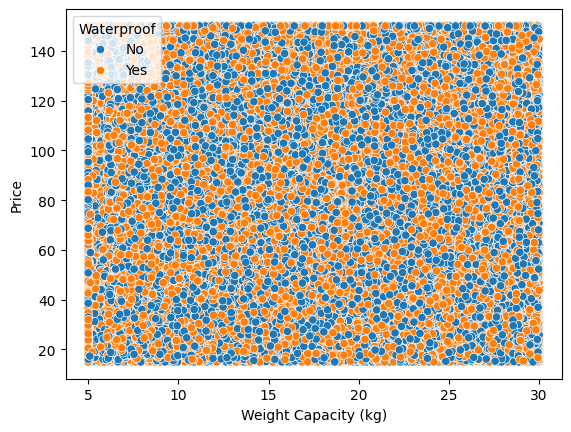

In [26]:
sns.scatterplot(data = train_data, x = "Weight Capacity (kg)", y = "Price", hue = "Waterproof" )

In [28]:
train_data["Brand"].unique()

array(['Jansport', 'Under Armour', 'Nike', 'Adidas', 'Puma', nan],
      dtype=object)

In [29]:
train_data["Material"].unique()

array(['Leather', 'Canvas', 'Nylon', nan, 'Polyester'], dtype=object)

In [30]:
train_data["Style"].unique()


array(['Tote', 'Messenger', nan, 'Backpack'], dtype=object)

In [31]:
train_data["Waterproof"].unique()

array(['No', 'Yes', nan], dtype=object)

In [34]:
train_data["Laptop Compartment"].unique()

array(['Yes', 'No', nan], dtype=object)

In [47]:
train_data["Brand"].value_counts(dropna=False)

Brand
Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
NaN              9705
Name: count, dtype: int64

In [48]:
train_data["Material"].value_counts(dropna=False)

Material
Polyester    79630
Leather      73416
Nylon        70603
Canvas       68004
NaN           8347
Name: count, dtype: int64

In [49]:
train_data["Compartments"].value_counts(dropna=False)

Compartments
1.0     31568
4.0     31498
2.0     30595
3.0     30293
7.0     30158
9.0     29965
5.0     29959
10.0    29815
8.0     28909
6.0     27240
Name: count, dtype: int64

In [50]:
train_data["Style"].value_counts(dropna=False)

Style
Messenger    100031
Tote          97438
Backpack      94561
NaN            7970
Name: count, dtype: int64

In [51]:
train_data["Waterproof"].value_counts(dropna=False)

Waterproof
Yes    148077
No     144873
NaN      7050
Name: count, dtype: int64

In [52]:
train_data["Laptop Compartment"].value_counts(dropna=False)

Laptop Compartment
Yes    148342
No     144214
NaN      7444
Name: count, dtype: int64

In [53]:
train_data["Color"].value_counts(dropna=False)

Color
Pink     51690
Gray     50280
Blue     48097
Red      47219
Green    46386
Black    46378
NaN       9950
Name: count, dtype: int64

In [54]:
train_data.isna().any().value_counts()

True     8
False    3
Name: count, dtype: int64

In [55]:
train_data.isna().value_counts()

id     Brand  Material  Size   Compartments  Laptop Compartment  Waterproof  Style  Color  Weight Capacity (kg)  Price
False  False  False     False  False         False               False       False  False  False                 False    246686
                                                                                    True   False                 False      8367
       True   False     False  False         False               False       False  False  False                 False      8311
       False  True      False  False         False               False       False  False  False                 False      7260
              False     False  False         False               False       True   False  False                 False      7006
                                                                                                                           ...  
       True   False     False  False         True                False       False  True   True            

In [105]:
dropped_train=train_data.dropna(how="any",axis=0,inplace=False)

In [107]:
dropped_train.isna().any()

id                      False
Brand                   False
Material                False
Size                    False
Compartments            False
Laptop Compartment      False
Waterproof              False
Style                   False
Color                   False
Weight Capacity (kg)    False
Price                   False
dtype: bool

In [108]:
dropped_train

id         Brand Material    Size  Compartments  \
0            0      Jansport  Leather  Medium           7.0   
1            1      Jansport   Canvas   Small          10.0   
2            2  Under Armour  Leather   Small           2.0   
3            3          Nike    Nylon   Small           8.0   
4            4        Adidas   Canvas  Medium           1.0   
...        ...           ...      ...     ...           ...   
299995  299995        Adidas  Leather   Small           9.0   
299996  299996      Jansport  Leather   Large           6.0   
299997  299997          Puma   Canvas   Large           9.0   
299998  299998        Adidas    Nylon   Small           1.0   
299999  299999  Under Armour   Canvas   Small           2.0   

       Laptop Compartment Waterproof      Style  Color  Weight Capacity (kg)  \
0                     Yes         No       Tote  Black             11.611723   
1                     Yes        Yes  Messenger  Green             27.078537   
2                     Yes         No  Messenger    Red             16.643760   
3                     Yes         No  Messenger  Green             12.937220   
4                     Yes        Yes  Messenger  Green             17.749338   
...                   ...        ...        ...    ...                   ...   
299995                 No         No       Tote   Blue             12.730812   
299996                 No        Yes       Tote   Blue             26.633182   
299997                Yes        Yes   Backpack   Pink             11.898250   
299998                 No        Yes       Tote   Pink              6.175738   
299999                 No        Yes   Backpack  Black             18.568865   

            Price  
0       112.15875  
1        68.88056  
2        39.17320  
3        80.60793  
4        86.02312  
...           ...  
299995  129.99749  
299996   19.85819  
299997  111.41364  
299998  115.89080  
299999   26.72762  

[246686 rows x 11 columns]

In [79]:
from sklearn import linear_model

In [80]:
price_reg = linear_model.LinearRegression()

In [193]:
x_train = dropped_train[['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)']].values

In [194]:
y_train = dropped_train["Price"].values

In [172]:
# #Brand, material, size, style
# cat_columns = ["Brand", "Material", "Size", "Style", "Color"]
# val_columns = ["Compartments", "Laptop Compartment", "Waterproof", "Weigh Capacity (kg)"]
# train_restricted = {}
# for brand in dropped_train["Brand"].unique():
#     for material in dropped_train["Material"].unique():
#         for size in dropped_train["Size"].unique():
#             for style in dropped_train["Style"].unique():
#                 train_restricted[(brand,material,size,style)] = dropped_train[dropped_train.Brand == brand and dropped_train.Material == material and dropped_train.Size == size and dropped_train.Style == style]
#                 x_train_restricted[(brand,material,size,style)] = train_restricted[(brand,material,size,style)][val_columns]


In [225]:
dropped_train.describe().T

count           mean           std   min  \
id                    246686.0  150048.329557  86604.008063   0.0   
Compartments          246686.0       5.448984      2.886397   1.0   
Weight Capacity (kg)  246686.0      18.016588      6.964860   5.0   
Price                 246686.0      81.582528     38.939976  15.0   

                              25%           50%            75%            max  
id                    75041.25000  150108.50000  224949.750000  299999.000000  
Compartments              3.00000       5.00000       8.000000      10.000000  
Weight Capacity (kg)     12.07621      18.04858      23.990489      29.999796  
Price                    47.75987      81.22631     115.006480     150.000000

In [198]:
y_train_jansport = jansport_data.pop("Price").values
jansport_data.pop("id")
x_train_jansport = jansport_data.values

In [199]:
price_reg.fit(X=x_train_jansport, y= y_train_jansport)

LinearRegression()

In [200]:
y_pred_jansport_train = price_reg.predict(x_train_jansport)

In [120]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [201]:
root_mean_squared_error(y_train_jansport,y_pred_jansport_train)
#38.86914614624474 (without color)
#38.86380553348416 (dropped all nan)
#38.951662975161135 (with id)

38.95198258573146

In [202]:
jansport_mean_price = [y_train_jansport.mean()]*len(y_pred_jansport_train)

In [203]:
root_mean_squared_error(y_train_jansport,jansport_mean_price)

38.96970151154625

In [491]:
test_data = pd.read_csv("data/test.csv")

In [492]:
test_data.isna().any()

id                      False
Brand                    True
Material                 True
Size                     True
Compartments            False
Laptop Compartment       True
Waterproof               True
Style                    True
Color                    True
Weight Capacity (kg)     True
dtype: bool

In [206]:
jansport_test_data = test_data[test_data.Brand == "Jansport"].dropna(subset="Weight Capacity (kg)",inplace=False)
jansport_test_data_index = jansport_test_data.pop("id")
jansport_test_data = pd.get_dummies(jansport_test_data,columns=["Laptop Compartment", "Waterproof", "Style", "Size", "Material", "Color"],drop_first=True).drop(columns="Brand",axis=1).values

In [207]:
y_pred_jansport_test = price_reg.predict(jansport_test_data)

In [208]:
y_pred_jansport_test

array([83.72142991, 79.39888969, 82.42350671, ..., 82.02371774,
       82.34619908, 83.43736682])

In [209]:
jansport_test_data_index

7         300007
11        300011
17        300017
20        300020
22        300022
           ...  
199971    499971
199973    499973
199979    499979
199994    499994
199997    499997
Name: id, Length: 37321, dtype: int64

In [382]:
submission = pd.read_csv("data/sample_submission.csv")

In [383]:
submission

id   Price
0       300000  81.411
1       300001  81.411
2       300002  81.411
3       300003  81.411
4       300004  81.411
...        ...     ...
199995  499995  81.411
199996  499996  81.411
199997  499997  81.411
199998  499998  81.411
199999  499999  81.411

[200000 rows x 2 columns]

In [359]:
submission["Price"] = 81.582528

In [227]:
submission.iloc[list(jansport_test_data_index.values -300000),1] = y_pred_jansport_test

In [311]:
submission

id      Price
0       300000  81.582528
1       300001  81.582528
2       300002  81.582528
3       300003  81.582528
4       300004  81.582528
...        ...        ...
199995  499995  81.582528
199996  499996  81.582528
199997  499997  83.437367
199998  499998  81.582528
199999  499999  81.582528

[200000 rows x 2 columns]

In [234]:
submission.to_csv("data/submission_jansport.csv",index=False)

In [ ]:
##drop if more than two columns have nan
#drop_train = train_data.dropna(thresh=10,axis = 0)

In [240]:
#one hot encoding
encoded_train_data = pd.get_dummies(dropped_train, columns=["Brand", "Material", "Style", "Color", "Size", "Laptop Compartment", "Waterproof"],drop_first=True)

In [ ]:
encoded_train_data.pop("id")

0              0
1              1
2              2
3              3
4              4
           ...  
299995    299995
299996    299996
299997    299997
299998    299998
299999    299999
Name: id, Length: 246686, dtype: int64

In [243]:
x_train_one_hot = encoded_train_data.values

In [ ]:
mean_test_weight = test_data[["Weight Capacity (kg)"]].mean()

In [520]:
mean_test_weight.iloc[0]

17.993033231213683

In [497]:
test_data.describe().T

count           mean           std       min  \
id                    200000.0  399999.500000  57735.171256  300000.0   
Compartments          200000.0       5.442855      2.888740       1.0   
Weight Capacity (kg)  199923.0      17.993033      6.972079       5.0   

                                25%           50%          75%       max  
id                    349999.750000  399999.50000  449999.2500  499999.0  
Compartments               3.000000       5.00000       8.0000      10.0  
Weight Capacity (kg)      12.068875      18.05475      23.9657      30.0

In [312]:
mean_by_cat = dropped_train.groupby(["Brand","Material","Size", "Laptop Compartment", "Waterproof", "Style", "Color"])["Price"].mean()
mean_by_cat_og = train_data.groupby(["Brand","Material","Size", "Laptop Compartment", "Waterproof", "Style", "Color"])["Price"].mean()

In [349]:
mean_by_cat["Jansport","Canvas"]

Size   Laptop Compartment  Waterproof  Style     Color
Large  No                  No          Backpack  Black    78.704010
                                                 Blue     81.887768
                                                 Gray     93.061716
                                                 Green    78.901213
                                                 Pink     79.600574
                                                            ...    
Small  Yes                 Yes         Tote      Blue     89.094194
                                                 Gray     77.098261
                                                 Green    79.670583
                                                 Pink     79.867646
                                                 Red      84.517053
Name: Price, Length: 216, dtype: float64

In [301]:
cat_id ={}
for brand in dropped_train["Brand"].unique():
    for material in dropped_train["Material"].unique():
        for size in dropped_train["Size"].unique():
            for style in dropped_train["Style"].unique():
                for color in dropped_train["Color"].unique():
                    for lp in ["Yes", "No"]:
                        for wp in ["Yes", "No"]:
                            cat_id[(brand,material,size,lp,wp,style,color)] = test_data[(test_data["Brand"] == brand) & (test_data["Material"] == material) & (test_data["Size"] ==size) & (test_data["Laptop Compartment"] == lp) & (test_data["Waterproof"]== wp) & (test_data["Style"]==style) & (test_data["Color"]==color)]["id"]

In [344]:
listid = cat_id[('Jansport',
  'Leather',
  'Medium',
  'Yes',
  'Yes',
  'Tote',
  'Black')].values

In [378]:
some_cat_id = {}
for brand in dropped_train["Brand"].unique():
    for material in dropped_train["Material"].unique():
        for size in dropped_train["Size"].unique():
            for style in dropped_train["Style"].unique():
                            some_cat_id[(brand,material,size,style)] = test_data[(test_data["Brand"] == brand) & (test_data["Material"] == material) & (test_data["Size"] ==size)  & (test_data["Style"]==style) ]["id"]

In [350]:
submission.iloc[list(cat_id[('Jansport','Leather','Medium', 'Yes', 'Yes','Tote', 'Black')].values-300000),1]=mean_by_cat['Jansport','Leather','Medium', 'Yes', 'Yes','Tote', 'Black']

In [351]:
for brand in dropped_train["Brand"].unique():
    for material in dropped_train["Material"].unique():
        for size in dropped_train["Size"].unique():
            for style in dropped_train["Style"].unique():
                for color in dropped_train["Color"].unique():
                    for lp in ["Yes", "No"]:
                        for wp in ["Yes", "No"]:
                            submission.iloc[list(cat_id[(brand,material,size, lp, wp,style, color)].values-300000),1]=mean_by_cat[brand,material,size, lp, wp,style, color]

In [385]:
for brand in dropped_train["Brand"].unique():
    for material in dropped_train["Material"].unique():
        for size in dropped_train["Size"].unique():
            for style in dropped_train["Style"].unique():
                submission.iloc[list(some_cat_id[(brand,material,size, style)].values-300000),1]=mean_by_cat[brand,material,size, :, :,style, :].mean()

In [386]:
submission

id      Price
0       300000  79.484013
1       300001  81.809297
2       300002  84.423288
3       300003  79.902799
4       300004  81.411000
...        ...        ...
199995  499995  84.423288
199996  499996  81.702157
199997  499997  82.840027
199998  499998  80.814609
199999  499999  81.496545

[200000 rows x 2 columns]

In [387]:
submission.to_csv("data/submission_cat2.csv",index=False)

In [384]:
for brand in dropped_train["Brand"].unique():
    submission.iloc[list(test_data[test_data["Brand"]==brand]["id"].values - 300000),1] = mean_by_cat[brand].mean()

In [513]:
mean_test_weight

Weight Capacity (kg)    17.993033
dtype: float64

In [517]:
test_data.fillna({"Weight Capacity (kg)": 17.993033},inplace=True)

In [518]:
test_data

id         Brand   Material    Size  Compartments  \
0       300000          Puma    Leather   Small           2.0   
1       300001          Nike     Canvas  Medium           7.0   
2       300002        Adidas     Canvas   Large           9.0   
3       300003        Adidas      Nylon   Large           1.0   
4       300004           NaN      Nylon   Large           2.0   
...        ...           ...        ...     ...           ...   
199995  499995        Adidas     Canvas   Large           2.0   
199996  499996          Nike  Polyester   Small           9.0   
199997  499997      Jansport      Nylon   Small           9.0   
199998  499998          Puma      Nylon   Large          10.0   
199999  499999  Under Armour    Leather  Medium           8.0   

       Laptop Compartment Waterproof      Style  Color  Weight Capacity (kg)  
0                      No         No       Tote  Green             20.671147  
1                      No        Yes   Backpack  Green             13.564105  
2                      No        Yes  Messenger   Blue             11.809799  
3                     Yes         No  Messenger  Green             18.477036  
4                     Yes        Yes       Tote  Black              9.907953  
...                   ...        ...        ...    ...                   ...  
199995                Yes         No  Messenger    Red              7.383498  
199996                 No        Yes  Messenger   Pink              6.058394  
199997                 No        Yes       Tote  Green             26.890163  
199998                Yes         No       Tote   Gray             25.769153  
199999                Yes        Yes  Messenger   Pink             29.175026  

[200000 rows x 10 columns]

In [519]:
test_data.isna().any()

id                      False
Brand                    True
Material                 True
Size                     True
Compartments            False
Laptop Compartment       True
Waterproof               True
Style                    True
Color                    True
Weight Capacity (kg)    False
dtype: bool

In [521]:
brand, material, size, style, color = 'Jansport', 'Canvas', 'Large', 'Tote', 'Red'

In [522]:
x = pd.get_dummies(dropped_train[(dropped_train["Brand"]==brand) & (dropped_train["Material"]==material) & (dropped_train["Size"]==size)& (dropped_train["Style"]==style)&(dropped_train["Color"]==color)],columns=["Laptop Compartment", "Waterproof"],drop_first=True).drop(columns=["id", "Brand", "Material", "Style","Size", "Color", "Price"]).values

In [523]:
x

array([[9.0, 14.699817091619597, False, True],
       [8.0, 13.09761819004988, False, True],
       [7.0, 24.0278171705888, False, False],
       [2.0, 23.014503800313737, False, True],
       [1.0, 25.809342459525617, True, True],
       [10.0, 6.844775450461887, True, False],
       [9.0, 14.35963398422443, False, False],
       [4.0, 27.85870797542574, True, False],
       [4.0, 17.341682286104373, True, True],
       [5.0, 27.74017837823056, True, True],
       [8.0, 15.908629300172295, False, False],
       [5.0, 15.63823161492416, False, False],
       [5.0, 11.78814098160633, True, True],
       [2.0, 21.235726887145105, False, False],
       [8.0, 21.286094985838407, True, False],
       [8.0, 22.38287949141799, True, False],
       [4.0, 12.874704740244685, True, True],
       [5.0, 13.828861918123248, True, True],
       [1.0, 24.99021188814202, False, True],
       [4.0, 11.251787170984036, False, True],
       [5.0, 16.291243261021684, False, True],
       [5.0, 12.93688065

In [524]:
y = dropped_train[(dropped_train["Brand"]==brand) & (dropped_train["Material"]==material) & (dropped_train["Size"]==size)& (dropped_train["Style"]==style)&(dropped_train["Color"]==color)].pop("Price").values

In [525]:
y.shape

(209,)

In [526]:
x_test = pd.get_dummies(test_data[(test_data["Brand"]==brand) & (test_data["Material"]==material) & (test_data["Size"]==size)& (test_data["Style"]==style)&(test_data["Color"]==color)],columns=["Laptop Compartment", "Waterproof"],drop_first=True).drop(columns=["id", "Brand", "Material", "Style","Size", "Color"]).values

In [527]:
x_test

array([[8.0, 13.73744009209848, True, False],
       [2.0, 25.828925107657764, True, False],
       [2.0, 29.40463914759268, True, False],
       [6.0, 28.956696243774243, True, False],
       [10.0, 20.15925030431713, True, False],
       [10.0, 18.934140512431338, False, True],
       [5.0, 28.738897883997385, False, True],
       [4.0, 27.893095505068384, False, False],
       [6.0, 24.005557522594323, True, False],
       [6.0, 21.92455808646372, True, True],
       [4.0, 15.927300774559225, False, True],
       [7.0, 11.449436119315129, True, True],
       [1.0, 8.566229248099951, True, True],
       [9.0, 27.63582613460048, False, True],
       [8.0, 17.8117048874484, False, True],
       [3.0, 15.355883266240951, True, False],
       [3.0, 23.5037968137059, True, False],
       [3.0, 11.674367428135216, False, False],
       [4.0, 15.94265595989052, True, True],
       [5.0, 21.381197054737868, False, True],
       [2.0, 20.91470412182569, False, True],
       [7.0, 22.834381839

In [528]:
x[0].shape

(4,)

In [529]:
price_reg.fit(x,y)

LinearRegression()

In [530]:
y_pred_train = price_reg.predict(x)
y_pred = price_reg.predict(x_test)

In [531]:
root_mean_squared_error(y_pred_train,y)

37.576360849229744

In [532]:
x_train_restricted = {}
y_train_restricted = {}
y_pred_restricted = {}
id_restricted = {}
for brand in dropped_train["Brand"].unique():
    for material in dropped_train["Material"].unique():
        for size in dropped_train["Size"].unique():
            for style in dropped_train["Style"].unique():
                for color in dropped_train["Color"].unique():
                    y=dropped_train[(dropped_train["Brand"]==brand) & (dropped_train["Material"]==material) & (dropped_train["Size"]==size)& (dropped_train["Style"]==style)&(dropped_train["Color"]==color)].pop("Price").values
                    x= pd.get_dummies(dropped_train[(dropped_train["Brand"]==brand) & (dropped_train["Material"]==material) & (dropped_train["Size"]==size)& (dropped_train["Style"]==style)&(dropped_train["Color"]==color)],columns=["Laptop Compartment", "Waterproof"],drop_first=True).drop(columns=["id", "Brand", "Material", "Style","Size", "Color", "Price"]).values
                    price_reg.fit(x,y)
                    x_test = pd.get_dummies(test_data[(test_data["Brand"]==brand) & (test_data["Material"]==material) & (test_data["Size"]==size)& (test_data["Style"]==style)&(test_data["Color"]==color)],columns=["Laptop Compartment", "Waterproof"],drop_first=True).drop(columns=["id", "Brand", "Material", "Style","Size", "Color"]).values
                    y_pred_restricted[(brand,material,size,style,color)] = price_reg.predict(x_test)
                    id_restricted[(brand,material,size,style,color)] = test_data[(test_data["Brand"]==brand) & (test_data["Material"]==material) & (test_data["Size"]==size)& (test_data["Style"]==style)&(test_data["Color"]==color)].index

In [533]:
y_pred_restricted

{('Jansport',
  'Leather',
  'Medium',
  'Tote',
  'Black'): array([87.321022  , 76.28248313, 92.45464197, 72.27997473, 92.9863246 ,
        71.01450275, 80.7574938 , 71.48007539, 79.82654846, 88.33546496,
        78.15118157, 79.46150702, 79.9184703 , 78.62274461, 76.20105622,
        84.70891773, 85.75118319, 88.33497262, 89.30381452, 81.92745173,
        79.40778111, 84.91164046, 70.45639541, 85.9566988 , 76.32694419,
        79.64149107, 87.02581402, 81.28750077, 93.01921106, 85.97140443,
        86.03445829, 88.93263423, 85.64509813, 71.37318792, 86.05625621,
        85.78868828, 80.5394353 , 80.12153707, 87.21929427, 81.34293951,
        80.81610191, 87.75793645, 87.36613747, 81.52654218, 83.63578527,
        73.11790398, 86.13395948, 78.71320107, 89.55008821, 84.5656316 ,
        87.27022922, 81.50320668, 91.02747093, 79.61790692, 89.56316884,
        85.52602788, 75.0076792 , 81.82599192, 77.15811854, 88.44520833,
        85.56538503, 77.21025948, 82.65587649, 91.88455158, 90.9

In [538]:
submission = pd.read_csv("data/Submission_2.csv")

In [539]:
for key in id_restricted:
    submission.iloc[list(id_restricted[key]),1] = y_pred_restricted[key]

In [542]:
submission.to_csv("data/submission_cat_regression.csv",index=False)